## Q3

In [4]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("C:/Users/Drishya/Downloads/dataset_3.csv")

In [8]:
df

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [9]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
A        2067
B           0
C           0
D           0
E           0
F           0
G           0
H           0
dtype: int64

In [10]:
new_df = df.fillna({'A' : df.A.mean()})

In [11]:
new_df

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,246.72,0,0


In [12]:
df.E.unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [13]:
new_df['E'] = new_df['E'].map({'NW':0,'cv':1,'NE':2,'SE':3})

In [14]:
new_df

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,0,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,0,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,0,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,0,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,0,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,0,231.97,0,0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,0,237.78,0,0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,0,242.70,0,0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,0,246.72,0,0


In [15]:
df_corr = new_df.corr()

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

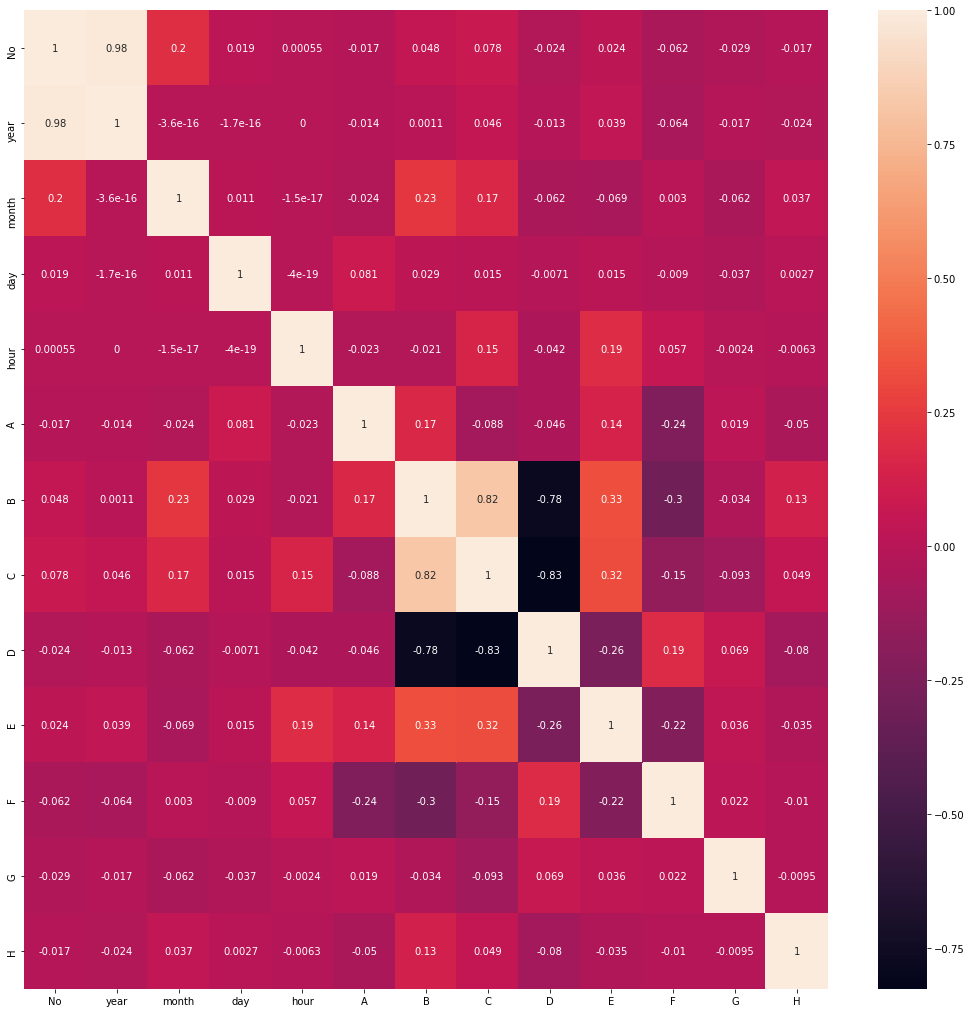

In [17]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [18]:
new_df = new_df.drop(["B","C"], axis = 1)

In [19]:
df_corr = new_df.corr()

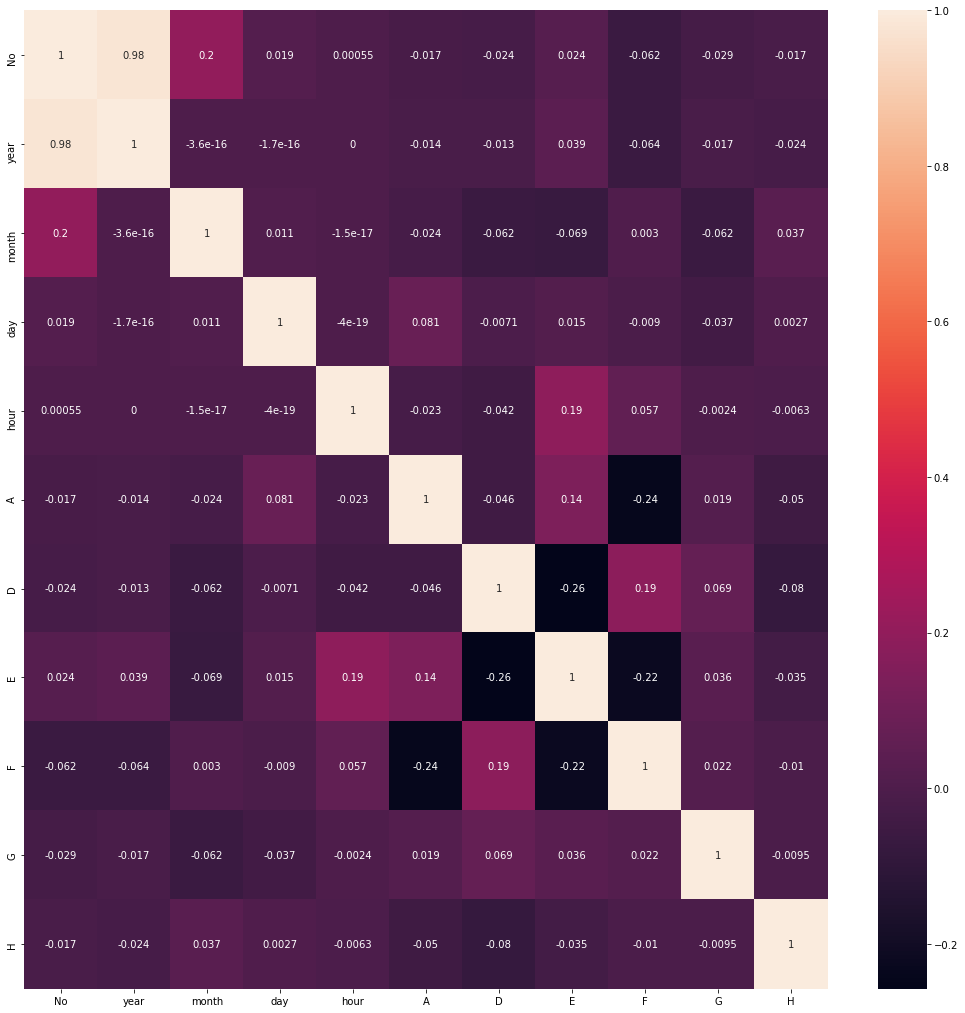

In [20]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [21]:
X = new_df.drop('month',axis = 1)
y = new_df.month

t = int(0.75 * len(X))
X_train, X_test = X[:t], X[t:]
y_train, y_test = y[:t], y[t:]

    

## Part 1.
Train a decision tree using both gini index and entropy. Don’t change any of other default values of the classifier. In the following models, use the criteria which gives better accuracy on test set.<br>


### Gini Impurity and Entropy

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini")
    clf_gini.fit(X_train, y_train)
    return clf_gini
    
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(criterion = "entropy")
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

# Driver code
def main():
    X = new_df.drop('month',axis = 1)
    y = new_df.month
    t = int(0.75 * len(X))
    X_train, X_test = X[:t], X[t:]
    y_train, y_test = y[:t], y[t:]
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Results Using Gini Index:")
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
        
# Calling main function
if __name__=="__main__":
    main()


Results Using Gini Index:
Accuracy :  9.373859072654254
Results Using Entropy:
Accuracy :  9.693318729463307


## Part 2
Train decision trees with different maximum depths [2, 4, 8, 10, 12, 30]. Find the best value of depth by using testing and training accuracy. Plot the curve between training and testing accuracy and depth to support your analysis

## Gini Imputiy

In [29]:
for i in [2,4,8,10,12,30]:
    clf = DecisionTreeClassifier(criterion='gini',max_depth = i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    predict_train=clf.predict(X_train)
    predict_test=clf.predict(X_test)
    a = accuracy_score(y_train,predict_train)
    b = accuracy_score(y_test,predict_test)
    print('Training Accuracy :',a )
    print('Testing Accuracy :',b )
    

Accuracy: 0.15553121577217963
Training Accuracy : 0.23052817329925765
Testing Accuracy : 0.15553121577217963
Accuracy: 0.08953997809419496
Training Accuracy : 0.2943592552026287
Testing Accuracy : 0.08953997809419496
Accuracy: 0.09364731653888281
Training Accuracy : 0.4812887915297554
Testing Accuracy : 0.09364731653888281
Accuracy: 0.09373859072654253
Training Accuracy : 0.5802908604113424
Testing Accuracy : 0.09373859072654253
Accuracy: 0.055220883534136546
Training Accuracy : 0.7041803577948156
Testing Accuracy : 0.055220883534136546
Accuracy: 0.09373859072654253
Training Accuracy : 1.0
Testing Accuracy : 0.09373859072654253


## Entropy

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
for i in [2,4,8,10,12,30]:
    clf = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    predict_train=clf.predict(X_train)
    predict_test=clf.predict(X_test)
    a = accuracy_score(y_train,predict_train)
    b = accuracy_score(y_test,predict_test)
    print('Training Accuracy :',a )
    print('Testing Accuracy :',b )
    
    


Accuracy: 0.1667579408543264
Training Accuracy : 0.24516246805403433
Testing Accuracy : 0.1667579408543264
Accuracy: 0.10742971887550201
Training Accuracy : 0.35733844468784226
Testing Accuracy : 0.10742971887550201
Accuracy: 0.11555312157721796
Training Accuracy : 0.7781124497991968
Testing Accuracy : 0.11555312157721796
Accuracy: 0.09510770354143848
Training Accuracy : 0.9361689180966289
Testing Accuracy : 0.09510770354143848
Accuracy: 0.09510770354143848
Training Accuracy : 0.9980528173299258
Testing Accuracy : 0.09510770354143848
Accuracy: 0.09510770354143848
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848


## Curves

In [50]:
train_scores = [0.24516246805403433,0.35733844468784226,0.7781124497991968,0.9361689180966289,0.9980528173299258,1.0]   #change these values
test_scores = [0.1667579408543264, 0.10742971887550201,0.11555312157721796,0.09510770354143848,0.09510770354143848,0.09510770354143848]
maximum_depth = [2,4,8,10,12,30]

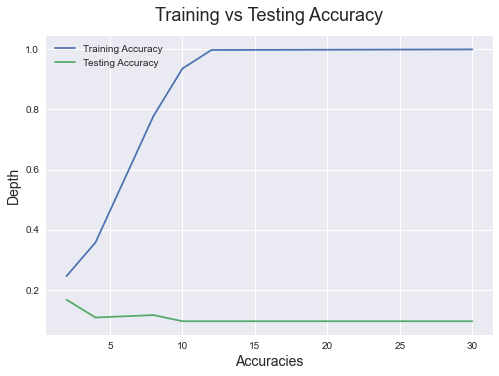

In [52]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(maximum_depth, train_scores, label = 'Training Accuracy')
plt.plot(maximum_depth, test_scores, label = 'Testing Accuracy')
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Accuracies', fontsize = 14)
plt.title('Training vs Testing Accuracy', fontsize = 18, y = 1.03)
plt.legend()

## Part 3
Ensembling is a method to combine multiple not-so-good models to get a better performing model (more in upcoming lectures). Create 150 different decision stumps (max depth 4). For each stump, train it on randomly selected 40% of the training data, i.e., select data for each stump separately. Now, predict the test samples’ labels by taking take majority vote of the output of the stumps. How is the performance effected as compared to part (a) and (b)?

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

X = new_df.drop('month',axis = 1)
y = new_df.month

t = int(0.75 * len(X))
X_train, X_test = X[:t], X[t:]
y_train, y_test = y[:t], y[t:]

q = int(0.40 * len(X_train))
X_train_new, X_test_new = X_train[:q], X_train[q:]
y_train_new, y_test_new = y_train[:q], y_train[q:]

kfold = model_selection.KFold(n_splits = 2, random_state=1, shuffle=True)
cart = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
num_trees = 150


def voting():
    # define the base models
    models = list()
    models.append(('Decision Tree', DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 2,min_samples_leaf=2,max_leaf_nodes=2)))
    models.append(('Bagging',BaggingClassifier(base_estimator = cart, n_estimators = num_trees)))
    models.append(('Adaboost',AdaBoostClassifier(n_estimators=num_trees, random_state = 1)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators = models, voting='hard')
    return ensemble

# get a list of models to evaluate
def getmodels():
    models = dict()
    models['Decision_Tree'] = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 2,min_samples_leaf=2,max_leaf_nodes=2)
    models['Bagging'] = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)
    models['Boosting'] = AdaBoostClassifier(n_estimators = num_trees, random_state=1)
    models['hard_voting'] = voting()
    return models

# evaluate a give model using cross-validation
def evaluate(model, X_train_new, y_train_new):
    scores = cross_val_score(model, X_train_new, y_train_new, scoring='accuracy', cv=kfold, n_jobs=-1, error_score='raise')
    return scores

from numpy import mean
from numpy import std
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Decision_Tree 0.165 (0.001)
>Bagging 0.339 (0.012)
>Boosting 0.241 (0.028)
>hard_voting 0.253 (0.039)


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

X = new_df.drop('month',axis = 1)
y = new_df.month

t = int(0.75 * len(X))
X_train, X_test = X[:t], X[t:]
y_train, y_test = y[:t], y[t:]

q = int(0.40 * len(X_train))
X_train_new, X_test_new = X_train[:q], X_train[q:]
y_train_new, y_test_new = y_train[:q], y_train[q:]

kfold = model_selection.KFold(n_splits = 2, random_state=1, shuffle=True)
cart = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
num_trees = 150


def get_voting():
    # define the base models
    models = list()
    models.append(('Bagging',BaggingClassifier(base_estimator = cart, n_estimators = num_trees)))
    models.append(('Adaboost',AdaBoostClassifier(n_estimators=num_trees, random_state = 1)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators = models, voting='hard')
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['Bagging'] = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)
    models['Boosting'] = AdaBoostClassifier(n_estimators = num_trees, random_state=1)
    models['hard_voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train_new, y_train_new):
    scores = cross_val_score(model, X_train_new, y_train_new, scoring='accuracy', cv=kfold, n_jobs=-1, error_score='raise')
    return scores

from numpy import mean
from numpy import std
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

## Part 4
Now, try to tune the decision stumps by changing the max-depth [5, 7, 13, 15, 25,best achieved from (b)] and number of trees. Analyze the effect on the training and testing accuracy. Use majority vote for final prediction on the test data.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

X = new_df.drop('month',axis = 1)
y = new_df.month

t = int(0.75 * len(X))
X_train, X_test = X[:t], X[t:]
y_train, y_test = y[:t], y[t:]

q = int(0.40 * len(X_train))
X_train_new, X_test_new = X_train[:q], X_train[q:]
y_train_new, y_test_new = y_train[:q], y_train[q:]

kfold = model_selection.KFold(n_splits = 2, random_state=1, shuffle=True)

for i in [5, 7, 13, 15, 25, 2]:
    cart = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    num_trees = 150
    def get_voting():
        # define the base models
        models = list()
        models.append(('Bagging',BaggingClassifier(base_estimator = cart, n_estimators = num_trees)))
        models.append(('Adaboost',AdaBoostClassifier(n_estimators=num_trees, random_state = 1)))
        # define the voting ensemble
        ensemble = VotingClassifier(estimators = models, voting='hard')
        return ensemble
    # get a list of models to evaluate
    def get_models():
        models = dict()
        models['Bagging'] = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)
        models['Boosting'] = AdaBoostClassifier(n_estimators = num_trees, random_state=1)
        models['hard_voting'] = get_voting()
        return models
    # evaluate a give model using cross-validation
    def evaluate_model(model, X_train_new, y_train_new):
        scores = cross_val_score(model, X_train_new, y_train_new, scoring='accuracy', cv=kfold, n_jobs=-1, error_score='raise')
        return scores
    models = get_models()
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X_train_new, y_train_new)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Bagging 0.953 (0.005)
>Boosting 0.237 (0.003)
>hard_voting 0.386 (0.063)
>Bagging 0.996 (0.001)
>Boosting 0.237 (0.003)
>hard_voting 0.403 (0.060)
>Bagging 0.998 (0.000)
>Boosting 0.237 (0.003)
>hard_voting 0.403 (0.060)
>Bagging 0.998 (0.000)
>Boosting 0.237 (0.003)
>hard_voting 0.403 (0.060)
>Bagging 0.998 (0.000)
>Boosting 0.237 (0.003)
>hard_voting 0.403 (0.060)
>Bagging 0.264 (0.008)
>Boosting 0.237 (0.003)
>hard_voting 0.226 (0.004)


In [46]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
import random

X = new_df.drop('month',axis = 1)
y = new_df.month

t = int(0.75 * len(X))
X_train, X_test = X[:t], X[t:]
y_train, y_test = y[:t], y[t:]

q = int(0.40 * len(X_train))
X_train_new, X_test_new = X_train[:q], X_train[q:]
y_train_new, y_test_new = y_train[:q], y_train[q:]

kfold = model_selection.KFold(n_splits = 2, random_state=1, shuffle=True)

for i in [5, 7, 13, 15, 25, 2]:
    cart = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    num_trees = random.randint(10,150)
    print(num_trees)

    def get_voting():
        # define the base models
        models = list()
        models.append(('Bagging',BaggingClassifier(base_estimator = cart, n_estimators = num_trees)))
        models.append(('Adaboost',AdaBoostClassifier(n_estimators=num_trees, random_state = 1)))
        # define the voting ensemble
        ensemble = VotingClassifier(estimators = models, voting='hard')
        return ensemble

    # get a list of models to evaluate
    def get_models():
        models = dict()
        models['Bagging'] = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)
        models['Boosting'] = AdaBoostClassifier(n_estimators = num_trees, random_state=1)
        models['hard_voting'] = get_voting()
        return models

    # evaluate a give model using cross-validation
    def evaluate_model(model, X_train_new, y_train_new):
        scores = cross_val_score(model, X_train_new, y_train_new, scoring='accuracy', cv=kfold, n_jobs=-1, error_score='raise')
        return scores

    models = get_models()
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X_train_new, y_train_new)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
        a = accuracy_score(y_train,predict_train)
        b = accuracy_score(y_test,predict_test)
        print('Training Accuracy :',a )
        print('Testing Accuracy :',b )

49
>Bagging 0.950 (0.004)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>Boosting 0.250 (0.006)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>hard_voting 0.518 (0.046)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
91
>Bagging 0.997 (0.001)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>Boosting 0.250 (0.006)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>hard_voting 0.544 (0.052)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
96
>Bagging 0.998 (0.000)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>Boosting 0.237 (0.003)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>hard_voting 0.403 (0.060)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
130
>Bagging 0.998 (0.000)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>Boosting 0.237 (0.003)
Training Accuracy : 1.0
Testing Accuracy : 0.09510770354143848
>hard_voting 0.403 (0.060